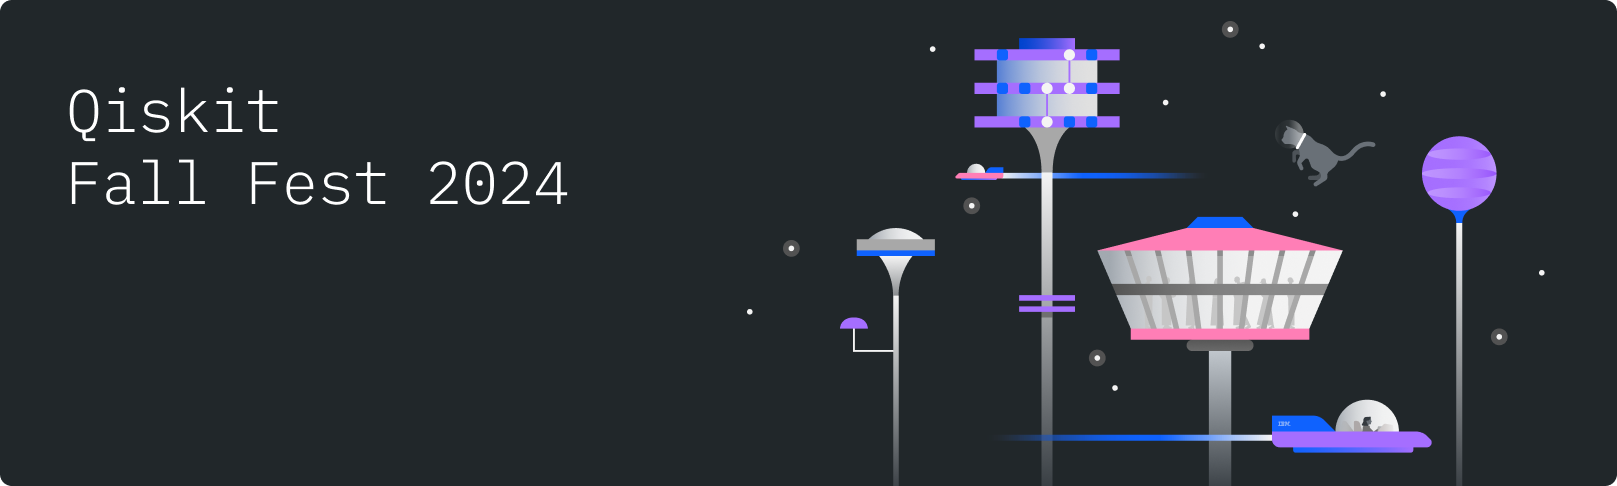

## Setup

Let's begin by getting all the necessary installs and imports out of the way.

In [48]:
%pip install qiskit[visualization]
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Quantum Random Number Generator using Qiskit

This notebook demonstrates a Quantum Random Number Generator (QRNG) using Qiskit. The circuit uses 128 qubits, each of which is put into superposition with a Hadamard gate. Upon measurement, each qubit will yield a random binary value (0 or 1), producing a 128-bit random binary string.


In [76]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Number of bits we need
total_bits = 128

# Number of qubits for each smaller circuit
qubits_per_circuit = 29

# Number of circuits needed
num_circuits = (total_bits + qubits_per_circuit - 1) // qubits_per_circuit  # Ceiling division

# Initialize a list to store the random bits
random_bits = []

# Setup the simulator
simulator = Aer.get_backend('qasm_simulator')

# Run multiple circuits to collect enough bits
for _ in range(num_circuits):
    # Create a quantum circuit with `qubits_per_circuit` qubits
    qc = QuantumCircuit(qubits_per_circuit)
    
    # Apply Hadamard gates to all qubits to put them into superposition
    qc.h(range(qubits_per_circuit))
    
    # Measure all qubits
    qc.measure_all()

    # Compile and run the circuit
    compiled_circuit = transpile(qc, simulator, optimization_level=3)
    
    # Execute the simulation
    result = simulator.run(compiled_circuit, shots=1).result()

    # Get the counts (measurement results)
    counts = result.get_counts()

    # Extract the most probable outcome (as a string of 1s and 0s)
    random_bits.append(list(counts.keys())[0])

# Join all results and take only the first `total_bits` bits
random_128bit = ''.join(random_bits)[:total_bits]

# Print the 128-bit random number
print(f"Generated 128-bit random number: {random_128bit}")


Generated 128-bit random number: 11001110001111110111111001100011100010011111011111001001110011100100000001000110111101000111000110000101100011010110011010101010


Converting the output 128-bit randomly generated number into a format for the AES:

In [78]:
# Function to convert binary string to byte list
def bin_to_bytes(bin_str):
    return [int(bin_str[i:i+8], 2) for i in range(0, len(bin_str), 8)]

key = bin_to_bytes(random_128bit)  # 128-bit key in byte form (16 bytes)

print(key)

[206, 63, 126, 99, 137, 247, 201, 206, 64, 70, 244, 113, 133, 141, 102, 170]


# AES Encryption

In [ ]:
import numpy as np

# AES S-Box
S_BOX = [
    [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
    [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x51, 0xA3],
    [0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2, 0xCD, 0x0C],
    [0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73, 0x60, 0x81],
    [0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB, 0xE0, 0x32],
    [0x6D, 0x15, 0x5B, 0x7E, 0x89, 0x76, 0xD6, 0x9E, 0xC3, 0xED, 0xE8, 0x87, 0xB2, 0x24, 0x61, 0x2C],
    [0x5D, 0x19, 0x40, 0xA7, 0x5C, 0x7B, 0xA6, 0x3A, 0xA3, 0xB5, 0x17, 0xB3, 0x20, 0xC1, 0x2E, 0x6F],
    [0xA4, 0xB0, 0xCC, 0x43, 0xA0, 0x5A, 0x39, 0x14, 0x91, 0x13, 0xF3, 0xDC, 0xB7, 0xE9, 0x9B, 0x68],
    [0x6C, 0x56, 0xA1, 0xA9, 0x1B, 0xE3, 0x28, 0x52, 0xB8, 0x02, 0x2D, 0x39, 0x8D, 0x72, 0x8B, 0xA6],
    [0xAD, 0x11, 0x55, 0xC0, 0x7C, 0x05, 0x95, 0xC2, 0xFB, 0x59, 0xF8, 0x6A, 0x3C, 0xB0, 0xBA, 0xCB],
    [0xBE, 0xD8, 0x3A, 0x7B, 0xAC, 0xC4, 0x0E, 0x15, 0x86, 0x4D, 0xD5, 0x18, 0xD7, 0x71, 0x8F, 0xA8],
    [0x10, 0x6F, 0x6A, 0x70, 0xDA, 0x08, 0x66, 0xD1, 0xC9, 0xDF, 0x1D, 0x34, 0x1C, 0xA8, 0xA7, 0xEE],
    [0x16, 0x04, 0xE6, 0x56, 0x63, 0x9A, 0xA2, 0xD7, 0x3E, 0x93, 0x21, 0x15, 0xF4, 0x0A, 0xCA, 0x33],
    [0xA9, 0xB1, 0x4F, 0x65, 0xA5, 0x07, 0x0C, 0x28, 0x3B, 0x3A, 0x8E, 0x23, 0x2E, 0x9E, 0xA5, 0x61],
    [0x1D, 0x6B, 0xA4, 0x44, 0x09, 0x20, 0x83, 0x02, 0x29, 0xAF, 0x74, 0x90, 0xF6, 0xE2, 0x54, 0x64],
    [0x73, 0x18, 0x9C, 0xC5, 0x82, 0xD6, 0x60, 0xA7, 0xEC, 0xF5, 0xE7, 0x4D, 0x12, 0x5F, 0x7D, 0x97]
]

# AES Rcon array (Round constants) for key expansion
RCON = [
    [0x01, 0x00, 0x00, 0x00],
    [0x02, 0x00, 0x00, 0x00],
    [0x04, 0x00, 0x00, 0x00],
    [0x08, 0x00, 0x00, 0x00],
    [0x10, 0x00, 0x00, 0x00],
    [0x20, 0x00, 0x00, 0x00],
    [0x40, 0x00, 0x00, 0x00],
    [0x80, 0x00, 0x00, 0x00],
    [0x1B, 0x00, 0x00, 0x00],
    [0x36, 0x00, 0x00, 0x00]
]


# Function to XOR two states (e.g., for AddRoundKey)
def xor_state(state, round_key):
    return [[state[i][j] ^ round_key[i][j] for j in range(4)] for i in range(4)]

# Function to implement SubBytes (using S-Box)
# This sub_bytes function is used in both key expansion and encryption
def sub_bytes(state):
    return [[S_BOX[b // 16][b % 16] for b in row] for row in state]

# Function to implement ShiftRows
def shift_rows(state):
    for i in range(1, 4):
        state[i] = state[i][i:] + state[i][:i]
    return state

# Function to implement MixColumns (Mix with fixed matrix)
def mix_columns(state):
    for i in range(4):
        a = state[0][i] ^ state[1][i] ^ state[2][i] ^ state[3][i]
        b = state[0][i]
        state[0][i] ^= a ^ xtime(state[0][i] ^ state[1][i])
        state[1][i] ^= a ^ xtime(state[1][i] ^ state[2][i])
        state[2][i] ^= a ^ xtime(state[2][i] ^ state[3][i])
        state[3][i] ^= a ^ xtime(state[3][i] ^ b)
    return state

def xtime(a):
    return (((a << 1) ^ 0x1b) & 0xff) if (a & 0x80) else (a << 1)

def key_expansion(key):
    # Initialize the round keys with the original key as a 4x4 matrix of bytes
    round_keys = [[key[i + j * 4] for i in range(4)] for j in range(4)]
    round_keys = [round_keys]  # Wrap it in an outer list to start the list of round keys
    
    for round in range(10):
        new_round_key = []
        
        for i in range(4):
            # For the first column, rotate, substitute bytes, and XOR with Rcon
            if i == 0:
                temp = round_keys[-1][3][1:] + round_keys[-1][3][:1]  # Rotate left
                temp = [S_BOX[b // 16][b % 16] for b in temp]  # Substitute bytes with S-Box
                temp[0] ^= RCON[round][0]  # XOR with round constant
                
                # XOR temp with the first column of the previous round key to get the first column of the new round key
                column = [(temp[j] ^ round_keys[-1][0][j]) % 256 for j in range(4)]
            else:
                # For other columns, XOR with the previous column in this new round key
                column = [(new_round_key[i-1][j] ^ round_keys[-1][i][j]) % 256 for j in range(4)]
            
            new_round_key.append(column)
        
        # Append the completed 4-column round key to the round_keys list
        round_keys.append(new_round_key)
    
    return round_keys



# Function for AddRoundKey
def add_round_key(state, round_key):
    return [[state[i][j] ^ round_key[i][j] for j in range(4)] for i in range(4)]

# AES Encryption function
def aes_encrypt(plaintext, key):
    # Initial state: plaintext as a 4x4 matrix
    state = [list(plaintext[i:i + 4]) for i in range(0, 16, 4)]
    
    # Key expansion
    round_keys = key_expansion(key)
    
    # Initial round key addition
    state = add_round_key(state, round_keys[0])
    
    # 9 main rounds
    for round in range(1, 10):
        state = sub_bytes(state)
        state = shift_rows(state)
        state = mix_columns(state)
        state = add_round_key(state, round_keys[round])
    
    # Final round (no MixColumns)
    state = sub_bytes(state)
    state = shift_rows(state)
    state = add_round_key(state, round_keys[10])
    
    # Return the final encrypted state as the ciphertext
    return [state[i][j] for i in range(4) for j in range(4)]


plaintext = "ExampleText1234"  # Original plaintext string

# Step 1: Split into 16-byte chunks, adding padding to the last chunk if needed
plaintext_chunks = [plaintext[i:i + 16] for i in range(0, len(plaintext), 16)]
if len(plaintext_chunks[-1]) < 16:
    plaintext_chunks[-1] = plaintext_chunks[-1].ljust(16, '\0')  # Pad the last chunk if it's less than 16 bytes

# Step 2: Convert each chunk to a byte array
plaintext_bytes = [[ord(c) for c in chunk] for chunk in plaintext_chunks]

# Encrypt each chunk
ciphertext = [aes_encrypt(chunk, key) for chunk in plaintext_bytes]

# After encryption, `ciphertext` will contain a list of encrypted 16-byte chunks.
print("Ciphertext:", ciphertext)

Ciphertext: [[51, 64, 213, 148, 97, 168, 167, 28, 212, 136, 79, 254, 96, 178, 124, 23]]


# AES Decryption

In [ ]:
# Inverse S-Box for AES decryption (needs to be filled with the correct values)
INV_S_BOX = [
    [0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB],
    [0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB],
    [0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E],
    [0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25],
    [0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92],
    [0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84],
    [0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06],
    [0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B],
    [0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73],
    [0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E],
    [0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B],
    [0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4],
    [0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F],
    [0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF],
    [0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61],
    [0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D]
]

# Inverse MixColumns matrix for AES
INV_MIX_COLUMNS_MATRIX = [
    [0x0E, 0x0B, 0x0D, 0x09],
    [0x09, 0x0E, 0x0B, 0x0D],
    [0x0D, 0x09, 0x0E, 0x0B],
    [0x0B, 0x0D, 0x09, 0x0E]
]

# Inverse SubBytes
def inv_sub_bytes(state):
    return [[INV_S_BOX[b // 16][b % 16] for b in row] for row in state]

# Inverse ShiftRows
def inv_shift_rows(state):
    for i in range(1, 4):
        state[i] = state[i][-i:] + state[i][:-i]  # Right rotation for decryption
    return state

# Inverse MixColumns
def inv_mix_columns(state):
    for i in range(4):
        temp = [state[j][i] for j in range(4)]
        state[0][i] = (mult(temp[0], 0x0E) ^ mult(temp[1], 0x0B) ^ mult(temp[2], 0x0D) ^ mult(temp[3], 0x09)) % 256
        state[1][i] = (mult(temp[0], 0x09) ^ mult(temp[1], 0x0E) ^ mult(temp[2], 0x0B) ^ mult(temp[3], 0x0D)) % 256
        state[2][i] = (mult(temp[0], 0x0D) ^ mult(temp[1], 0x09) ^ mult(temp[2], 0x0E) ^ mult(temp[3], 0x0B)) % 256
        state[3][i] = (mult(temp[0], 0x0B) ^ mult(temp[1], 0x0D) ^ mult(temp[2], 0x09) ^ mult(temp[3], 0x0E)) % 256
    return state

# Helper function for Galois Field multiplication in MixColumns
def mult(a, b):
    result = 0
    for i in range(8):
        if b & 1:
            result ^= a
        a = (a << 1) ^ (0x1B if a & 0x80 else 0)
        b >>= 1
    return result % 256

# AES decryption function
# Example: Adding debug prints in aes_decrypt
def aes_decrypt(ciphertext, key):
    # Key expansion
    round_keys = key_expansion(key)
    print("round_keys: ",round_keys)
    
    # Initialize state from ciphertext
    state = np.array(ciphertext).reshape(4, 4).tolist()
    print("State after correct initialization:", state)


    #print("Initial State:", state)

    print("State before AddRoundKey:", state)
    print("Round key:", round_keys[10])  # or the corresponding round key in the loop

    # Start with the last round key
    state = add_round_key(state, round_keys[10])
    #print("After Initial AddRoundKey:", state)

    # 9 main rounds in reverse order
    for round in range(9, 0, -1):
        state = inv_shift_rows(state)
        #print(f"After InvShiftRows (Round {round}):", state)

        state = inv_sub_bytes(state)
        #print(f"After InvSubBytes (Round {round}):", state)

        state = add_round_key(state, round_keys[round])
        #print(f"After AddRoundKey (Round {round}):", state)

        state = inv_mix_columns(state)
        #print(f"After InvMixColumns (Round {round}):", state)
    
    # Final round (no InvMixColumns)
    state = inv_shift_rows(state)
    state = inv_sub_bytes(state)
    state = add_round_key(state, round_keys[0])
    #print("After Final AddRoundKey:", state)

    # Flatten the state matrix to obtain the plaintext
    plaintext = [state[i][j] for i in range(4) for j in range(4)]
    return plaintext


decrypted_plaintext = aes_decrypt(ciphertext, key)

# Convert decrypted byte array back to a string
decrypted_text = ''.join(chr(b) for b in decrypted_plaintext).rstrip('\0')
print(f'decrypted plain text: {decrypted_text}')

round_keys:  [[[96, 53, 138, 240], [84, 61, 255, 10], [2, 28, 83, 116], [139, 155, 35, 44]], [[11, 168, 121, 201], [95, 149, 134, 195], [93, 137, 213, 183], [214, 18, 246, 155]], [[192, 200, 19, 197], [159, 93, 149, 6], [194, 212, 64, 177], [20, 198, 182, 42]], [[102, 174, 3, 63], [249, 243, 150, 57], [59, 39, 214, 136], [47, 225, 96, 162]], [[5, 243, 57, 51], [252, 0, 175, 10], [199, 39, 121, 130], [232, 198, 25, 32]], [[183, 39, 121, 26], [75, 39, 214, 16], [140, 0, 175, 146], [100, 198, 182, 178]], [[53, 65, 19, 70], [126, 102, 197, 86], [242, 102, 106, 196], [150, 160, 220, 118]], [[203, 111, 42, 211], [181, 9, 239, 133], [71, 111, 133, 65], [209, 207, 89, 55]], [[120, 130, 141, 98], [205, 139, 98, 231], [138, 228, 231, 166], [91, 43, 190, 145]], [[156, 37, 156, 229], [81, 174, 254, 2], [219, 74, 25, 164], [128, 97, 167, 53]], [[179, 48, 139, 137], [226, 158, 117, 139], [57, 212, 108, 47], [185, 181, 203, 26]]]
State after correct initialization: [[56, 91, 28, 171], [242, 51, 47, 1